# COVID-19 Analysis & Visualizations

### Import necessary tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Load dataset

In [2]:
path_to_dataset = 'novel-corona-virus-2019-dataset'

In [3]:
data = pd.read_csv(f'{path_to_dataset}/covid_19_data.csv')

### Dataset info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 8 columns):
SNo                6162 non-null int64
ObservationDate    6162 non-null object
Province/State     3700 non-null object
Country/Region     6162 non-null object
Last Update        6162 non-null object
Confirmed          6162 non-null float64
Deaths             6162 non-null float64
Recovered          6162 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 385.2+ KB


In [5]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,6162.000000,6162.000000,6162.000000,6162.000000
mean,3081.500000,588.957481,18.960240,220.271503
std,1778.960511,4908.724815,198.962911,2466.089672
min,1.000000,0.000000,0.000000,0.000000
25%,1541.250000,2.000000,0.000000,0.000000
50%,3081.500000,11.000000,0.000000,0.000000
75%,4621.750000,100.000000,1.000000,12.000000
max,6162.000000,67798.000000,3099.000000,55142.000000


In [6]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


## Preprocessing

### Missing values

In [7]:
data.isnull().sum()

SNo                   0
ObservationDate       0
Province/State     2462
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64

We're missing 2462 values from `Province/State` column

In [8]:
# Filling null values with `Unknown`
data.fillna('Unknown', inplace=True)

In [9]:
data.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

### Renaming columns

In [10]:
data.rename(columns={'ObservationDate': 'Observed', 'Last Update': 'Updated'}, inplace=True)

In [11]:
data.tail()

,SNo,Observed,Province/State,Country/Region,Updated,Confirmed,Deaths,Recovered
6157,6158,03/16/2020,Cayman Islands,UK,2020-03-16T14:53:04,1.0,1.0,0.0
6158,6159,03/16/2020,Gibraltar,UK,2020-03-14T16:33:03,1.0,0.0,1.0
6159,6160,03/16/2020,Diamond Princess cruise ship,Australia,2020-03-14T02:33:04,0.0,0.0,0.0
6160,6161,03/16/2020,West Virginia,US,2020-03-10T02:33:04,0.0,0.0,0.0
6161,6162,03/16/2020,Unknown,occupied Palestinian territory,2020-03-11T20:53:02,0.0,0.0,0.0


### Normalizing dates

In [12]:
data['Observed'] = data['Observed'].apply(pd.to_datetime)
data['Updated'] = data['Updated'].apply(pd.to_datetime)

In [13]:
data.head()

,SNo,Observed,Province/State,Country/Region,Updated,Confirmed,Deaths,Recovered
0,1,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
1,2,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0
2,3,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0
3,4,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0
4,5,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0


### Processing columns

In [14]:
data.drop(['SNo'], axis=1, inplace=True) # We don't need this column
data['Non_recovered'] = data['Confirmed'] - data['Recovered'] - data['Deaths']

## Analysis & Visualizations

In [15]:
total_cases = data.groupby(['Observed']).sum().reset_index()
total_cases

,Observed,Confirmed,Deaths,Recovered,Non_recovered
0,2020-01-22,555.0,17.0,28.0,510.0
1,2020-01-23,653.0,18.0,30.0,605.0
2,2020-01-24,941.0,26.0,36.0,879.0
3,2020-01-25,1438.0,42.0,39.0,1357.0
4,2020-01-26,2118.0,56.0,52.0,2010.0
5,2020-01-27,2927.0,82.0,61.0,2784.0
6,2020-01-28,5578.0,131.0,107.0,5340.0
7,2020-01-29,6165.0,133.0,126.0,5906.0
8,2020-01-30,8235.0,171.0,143.0,7921.0
9,2020-01-31,9925.0,213.0,222.0,9490.0


In [66]:
print('Last Observabled Date:', total_cases['Observed'].tolist()[-1].strftime('%b %d, %Y'))

Last Observabled Date: Mar 16, 2020


Text(0.5, 1.0, 'Total Cases in the World')

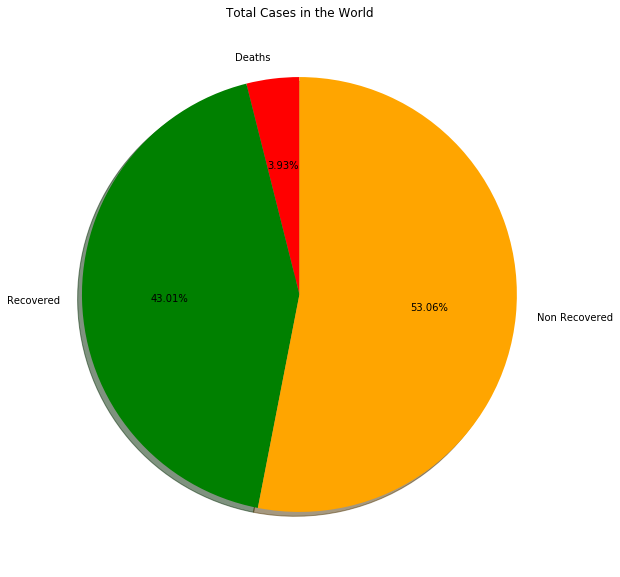

In [67]:
values = total_cases.drop(['Observed', 'Confirmed'], axis=1)[-1:].values.transpose()
plt.figure(figsize=(10,10))
plt.pie(values, 
        labels=['Deaths', 'Recovered', 'Non Recovered'], 
        colors=['red', 'green', 'orange'],
        autopct='%.2f%%', 
        startangle=90, 
        shadow=True)
plt.title('Total Cases in the World')

Text(0, 0.5, 'Cases')

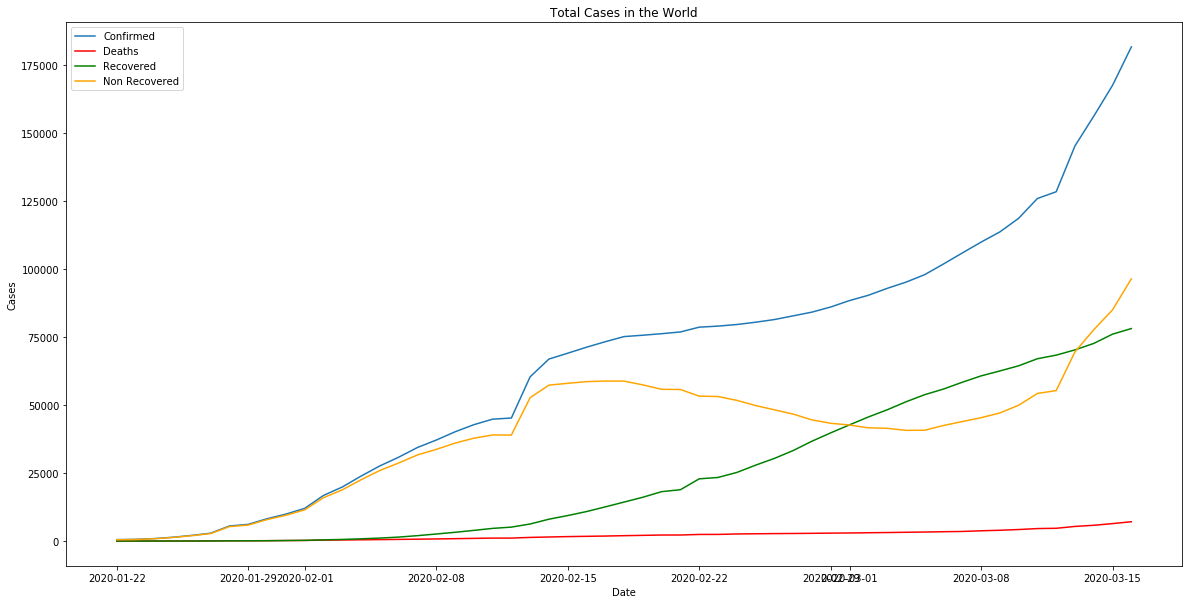

In [22]:
plt.figure(figsize=(20,10))
sns.lineplot(total_cases['Observed'], total_cases['Confirmed'])
sns.lineplot(total_cases['Observed'], total_cases['Deaths'], color='red')
sns.lineplot(total_cases['Observed'], total_cases['Recovered'], color='green')
sns.lineplot(total_cases['Observed'], total_cases['Non_recovered'], color='orange')
plt.legend(['Confirmed', 'Deaths', 'Recovered', 'Non Recovered'])
plt.title('Total Cases in the World')
plt.xlabel('Date')
plt.ylabel('Cases')

Text(0, 0.5, 'Rate')

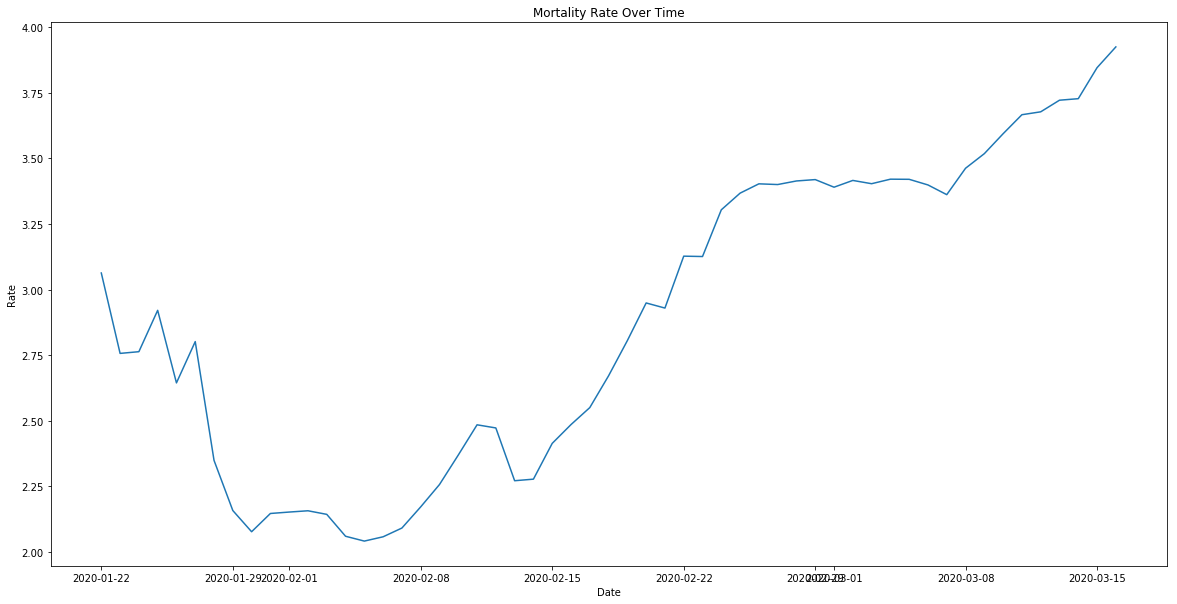

In [20]:
plt.figure(figsize=(20,10))
sns.lineplot(total_cases['Observed'], total_cases['Deaths']*100/total_cases['Confirmed'])
plt.title('Mortality Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')

Text(0, 0.5, 'Rate')

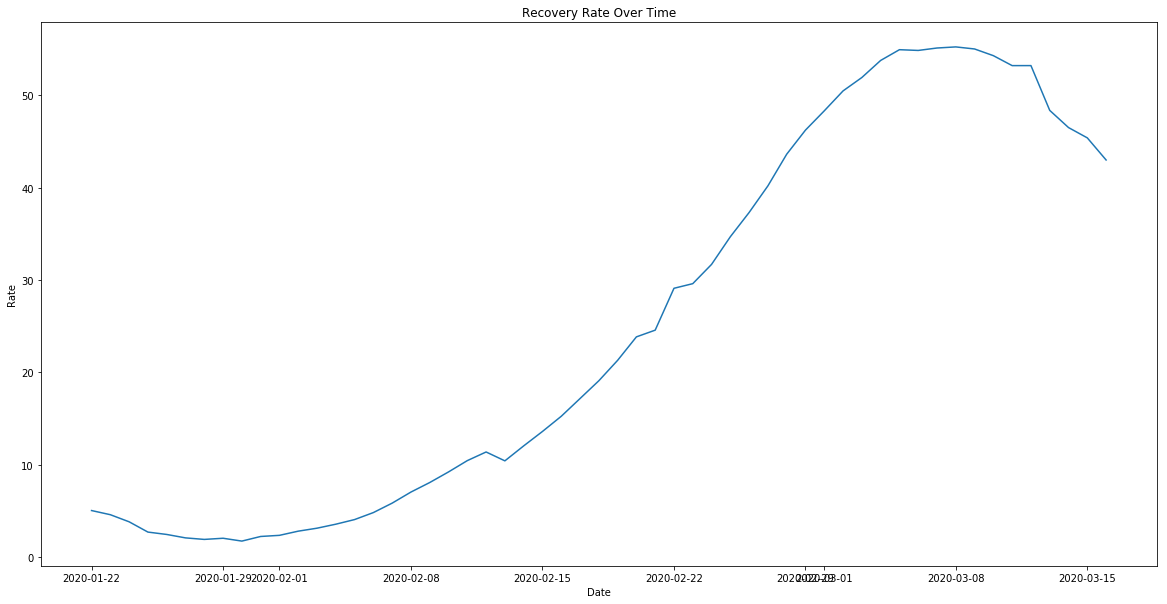

In [21]:
plt.figure(figsize=(20,10))
sns.lineplot(total_cases['Observed'], total_cases['Recovered']*100/total_cases['Confirmed'])
plt.title('Recovery Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Rate')

Text(0, 0.5, 'Cases')

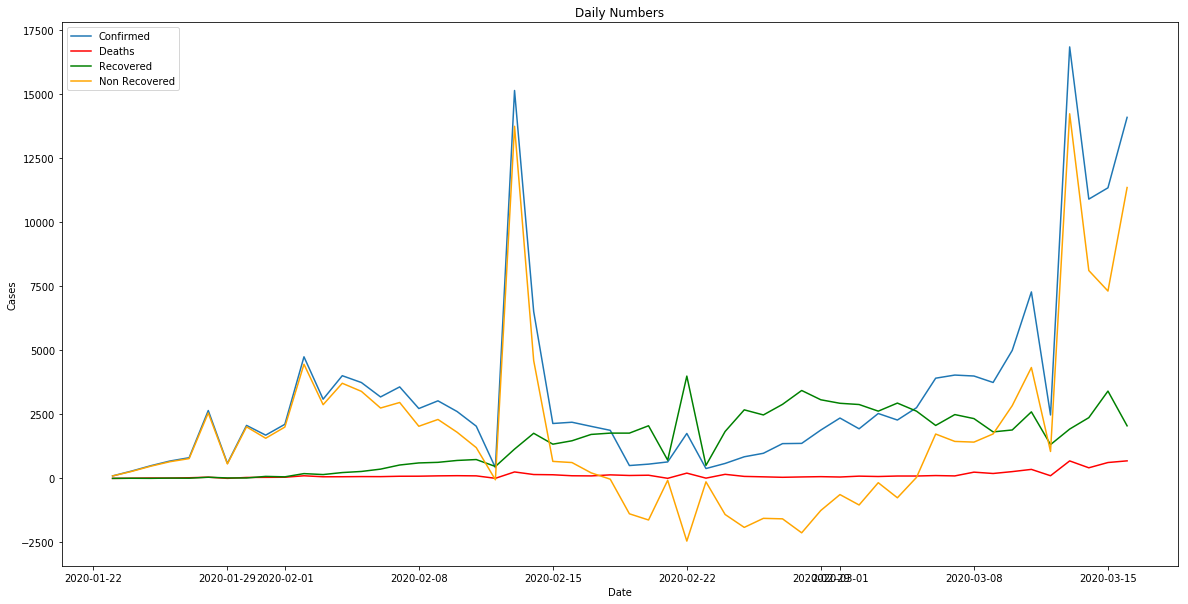

In [70]:
plt.figure(figsize=(20,10))
sns.lineplot(total_cases['Observed'], total_cases['Confirmed'].diff())
sns.lineplot(total_cases['Observed'], total_cases['Deaths'].diff(), color='red')
sns.lineplot(total_cases['Observed'], total_cases['Recovered'].diff(), color='green')
sns.lineplot(total_cases['Observed'], total_cases['Non_recovered'].diff(), color='orange')
plt.legend(['Confirmed', 'Deaths', 'Recovered', 'Non Recovered'])
plt.title('Daily Numbers')
plt.xlabel('Date')
plt.ylabel('Cases')